# Compare normalization in spiCiCAP dataset

Goal: compare sFC results using my normalization procedure and Caro's

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path

In [49]:
# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

In [50]:
%matplotlib inline

## Import data

### Data structure

_**Note:** Here, only subjects with FD < 0.3mm are kept._

In [51]:
Root='/media/miplab-nas2/Data/SpinalCord/3_RestingState/LongRecordings/Cervical/'
Directories={'FuncDir':'/Functional/',
             'TCDir':'TC/',
             'maskNames':['C5toC7_VR','C5toC7_VL','C5toC7_DR','C5toC7_DL'],
             'list_subjects':{'RS_AT':['RS_Moco_SCT'],'RS_EP':['RS_Moco_SCT'],'RS_FB':['RS_Moco_SCT'],'RS_GB':['RS_Moco_SCT'],'RS_GP':['RS_Moco_SCT'],'RS_LJ':['RS_Moco_SCT'],'RS_MD':['RS_Moco_SCT'],'RS_MP':['RS_Moco_SCT'],'RS_NG':['RS_Moco_SCT'],'RS_NK':['RS_Moco_SCT'],'RS_RL':['RS_Moco_SCT'],'RS_SA':['RS_Moco_SCT'],'RS_SL':['RS_Moco_SCT'],'RS_SW':['RS_Moco_SCT'],'RS_VG':['RS_Moco_SCT'],'RS_VS':['RS_Moco_SCT'],'RS_YF':['RS_Moco_SCT'],'RS_AO':['RS_Moco_SCT']},
             'FuncDir':'/Functional_SCT/',
             'TCDir':'/TC_atlas_masks/',
} 

### Read subject data

#### Timecourses

In [52]:
subs = []
sessions = []
masks = []
tc_caro = np.empty((239,0))
tc_mine = np.empty((239,0))
tc_spline = np.empty((239,0))


for sub in Directories['list_subjects']: # Loop through all subjects
    for session in Directories['list_subjects'][sub]: # Loop through sessions for a particular subject        
        print(sub)
        SubDir = Root + sub + '/' + Directories['FuncDir'] + session 
        for mask in range(0,len(Directories['maskNames'])): # Loop through masks
            subs.append(sub)
            sessions.append(session)
            masks.append(Directories['maskNames'][mask])
            tc_caro = np.append(tc_caro,np.array(pd.read_csv(SubDir + Directories['TCDir'] + Directories['maskNames'][mask] + '_nn_caro.txt')),axis=1)       
            tc_mine = np.append(tc_mine,np.array(pd.read_csv(SubDir + Directories['TCDir'] + Directories['maskNames'][mask]+ '_nn_mynorm.txt')),axis=1)    
            tc_spline = np.append(tc_spline,np.array(pd.read_csv(SubDir + Directories['TCDir'] + Directories['maskNames'][mask]+ '_spline_mynorm.txt')),axis=1)    


colnames = pd.MultiIndex.from_arrays([subs,sessions,masks], names=["subjects","sessions","masks"])
# Caro's 
tcs_caro_df = pd.DataFrame(tc_caro,columns=colnames)
# Mine
tcs_mine_df = pd.DataFrame(tc_mine,columns=colnames)
# Mine (spline)
tcs_spline_df = pd.DataFrame(tc_spline,columns=colnames)

RS_AT
RS_EP
RS_FB
RS_GB
RS_GP
RS_LJ
RS_MD
RS_MP
RS_NG
RS_NK
RS_RL
RS_SA
RS_SL
RS_SW
RS_VG
RS_VS
RS_YF
RS_AO


In [77]:
# Note: to access a particular element in df: tcs_df.xs(("T4","C5_short_gm_LD"),level=("sessions","masks"),axis=1)

## Correlation analyses

### Compute correlations

In [53]:
corr_all_caro = np.empty((len(Directories['maskNames'])**2,0)) # One value for each correlation type (i.e., between two masks)
corr_all_mine = np.empty((len(Directories['maskNames'])**2,0)) # One value for each correlation type (i.e., between two masks)
corr_all_spline = np.empty((len(Directories['maskNames'])**2,0)) # One value for each correlation type (i.e., between two masks)

subs = [] # For the column names
sessions = []
masks1 = []
masks2 = []
for sub in Directories['list_subjects']:
    for session in Directories['list_subjects'][sub]: # Loop through sessions for a particular subject        
            subs.append(sub)
            sessions.append(session)
            tmp_corr_caro = np.zeros((len(Directories['maskNames'])**2,1))
            tmp_corr_mine = np.zeros((len(Directories['maskNames'])**2,1))
            tmp_corr_spline = np.zeros((len(Directories['maskNames'])**2,1))
            ix = 0
            for mask1ix,mask1 in enumerate(Directories['maskNames']):
                for mask2ix,mask2 in enumerate(Directories['maskNames']):
                        tmp_corr_caro[ix]=np.corrcoef(tcs_caro_df.xs((sub,session,mask1),level=("subjects","sessions","masks"),axis=1),tcs_caro_df.xs((sub,session,mask2),level=("subjects","sessions","masks"),axis=1),rowvar=False)[1,0]
                        tmp_corr_mine[ix]=np.corrcoef(tcs_mine_df.xs((sub,session,mask1),level=("subjects","sessions","masks"),axis=1),tcs_mine_df.xs((sub,session,mask2),level=("subjects","sessions","masks"),axis=1),rowvar=False)[1,0]
                        tmp_corr_spline[ix]=np.corrcoef(tcs_spline_df.xs((sub,session,mask1),level=("subjects","sessions","masks"),axis=1),tcs_spline_df.xs((sub,session,mask2),level=("subjects","sessions","masks"),axis=1),rowvar=False)[1,0]
                        masks1.append(mask1)
                        masks2.append(mask2)
                        ix+=1
            corr_all_caro=np.append(corr_all_caro,tmp_corr_caro,axis=1)            
            corr_all_mine=np.append(corr_all_mine,tmp_corr_mine,axis=1)
            corr_all_spline=np.append(corr_all_spline,tmp_corr_spline,axis=1)

colnames = pd.MultiIndex.from_arrays([subs,sessions], names=["subjects","sessions"])
indnames = pd.MultiIndex.from_arrays([masks1[0:len(Directories['maskNames'])**2],masks2[0:len(Directories['maskNames'])**2]], names=["mask1","mask2"])
corrs_df_caro = pd.DataFrame(corr_all_caro,index=indnames,columns=colnames)
corrs_df_mine = pd.DataFrame(corr_all_mine,index=indnames,columns=colnames)
corrs_df_spline = pd.DataFrame(corr_all_spline,index=indnames,columns=colnames)

### Plot correlation matrix for each normalization

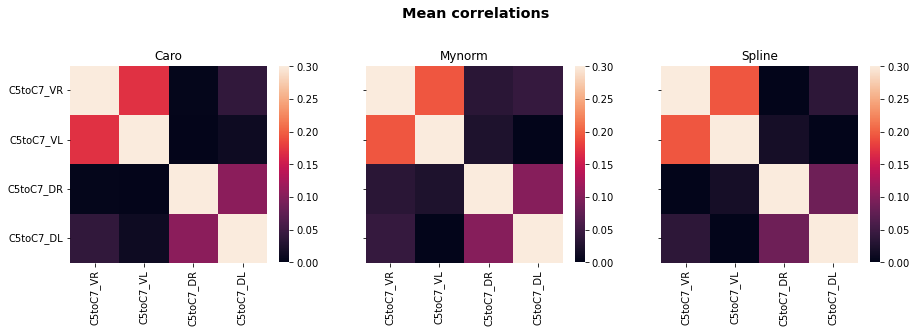

In [55]:
# Then, we compute the average confusion matrix for each normalization
mean_corr_caro = np.zeros((len(Directories['maskNames']),len(Directories['maskNames'])))
mean_corr_mine = np.zeros((len(Directories['maskNames']),len(Directories['maskNames'])))
mean_corr_spline = np.zeros((len(Directories['maskNames']),len(Directories['maskNames'])))


fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Mean correlations',y=0.94,fontsize='x-large',weight="bold");
mean_corr_caro = np.reshape(np.array(corrs_df_caro.xs('RS_Moco_SCT',level="sessions",axis=1)).mean(axis=1), (len(Directories['maskNames']), len(Directories['maskNames'])))
sns.heatmap(mean_corr_caro,ax=axes[0],xticklabels=Directories['maskNames'],yticklabels=Directories['maskNames'],vmin=0,vmax=0.3,square=True,cbar_kws={"shrink": 0.72})
axes[0].set_title('Caro');
mean_corr_mine = np.reshape(np.array(corrs_df_mine.xs('RS_Moco_SCT',level="sessions",axis=1)).mean(axis=1), (len(Directories['maskNames']), len(Directories['maskNames'])))
sns.heatmap(mean_corr_mine,ax=axes[1],xticklabels=Directories['maskNames'],yticklabels=Directories['maskNames'],vmin=0,vmax=0.3,square=True,cbar_kws={"shrink": 0.72})
axes[1].set_title('Mynorm');
mean_corr_spline = np.reshape(np.array(corrs_df_spline.xs('RS_Moco_SCT',level="sessions",axis=1)).mean(axis=1), (len(Directories['maskNames']), len(Directories['maskNames'])))
sns.heatmap(mean_corr_spline,ax=axes[2],xticklabels=Directories['maskNames'],yticklabels=Directories['maskNames'],vmin=0,vmax=0.3,square=True,cbar_kws={"shrink": 0.72})
axes[2].set_title('Spline');